<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Kwasniewska/Klasyfikacja_binarna_regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, roc_curve

In [115]:
data = load_breast_cancer()
y = data.target #list(data.target_names)
X = data.data #data.feature_names

In [116]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['target'])

In [117]:
len(y)

569

In [118]:
y.sum()

target    357
dtype: int64

<Axes: xlabel='mean area', ylabel='Count'>

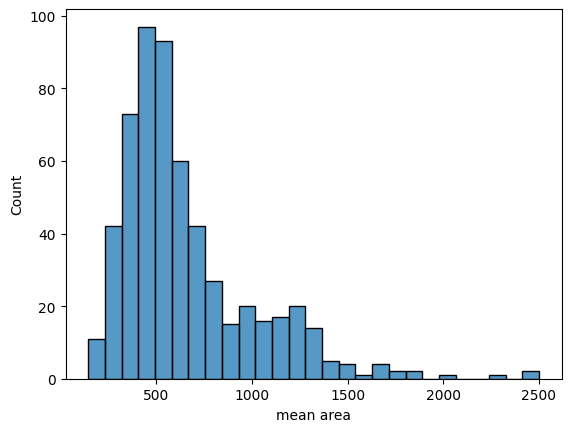

In [119]:
sns.histplot(data = X, x = "mean area")

<Axes: xlabel='mean area', ylabel='target'>

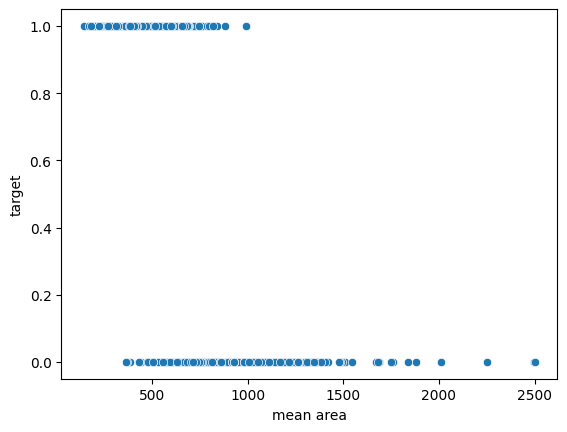

In [120]:
sns.scatterplot(data = X, x = "mean area", y = y['target'])

In [121]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
clf = LogisticRegression(random_state=0,  max_iter=10000).fit(X_train, y_train)
y_predict = clf.predict(X_test)
#clf.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97        63\n           1       0.98      0.98      0.98       108\n\n    accuracy                           0.98       171\n   macro avg       0.97      0.97      0.97       171\nweighted avg       0.98      0.98      0.98       171\n'

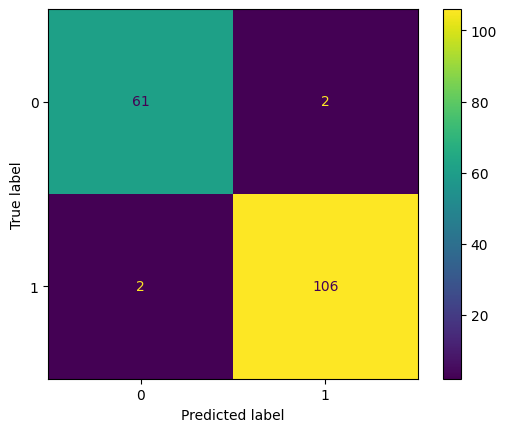

In [124]:
confusion_matrix(y_test,y_predict)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict), display_labels=clf.classes_).plot()
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.97      0.92      0.94        63\n           1       0.95      0.98      0.97       108\n\n    accuracy                           0.96       171\n   macro avg       0.96      0.95      0.96       171\nweighted avg       0.96      0.96      0.96       171\n'

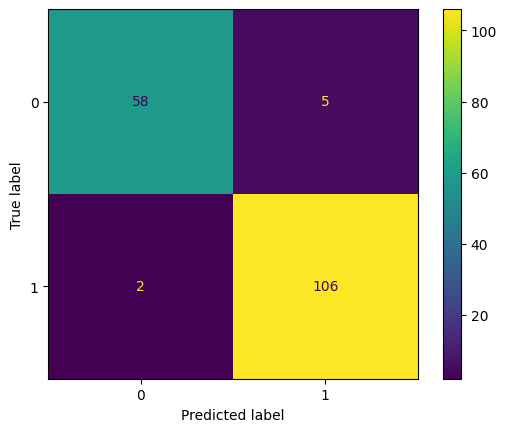

In [127]:
y_predict_prob_class_1 = clf.predict_proba(X_test)[:,1]
y_predict_class = [1 if prob > 0.2 else 0 for prob in y_predict_prob_class_1]
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_class), display_labels=clf.classes_).plot()
classification_report(y_test,y_predict_class)

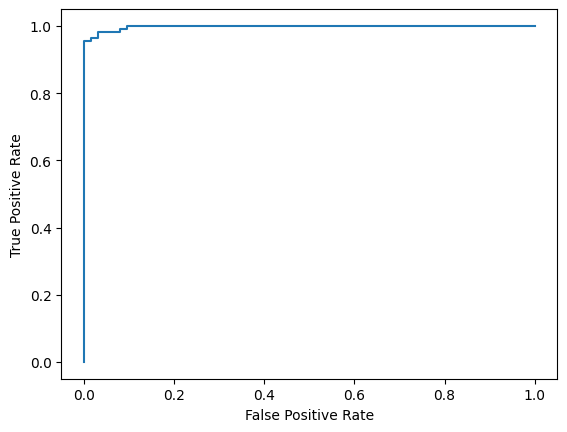

In [126]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [129]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict_neigh = neigh.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94        63\n           1       0.95      0.99      0.97       108\n\n    accuracy                           0.96       171\n   macro avg       0.96      0.95      0.96       171\nweighted avg       0.96      0.96      0.96       171\n'

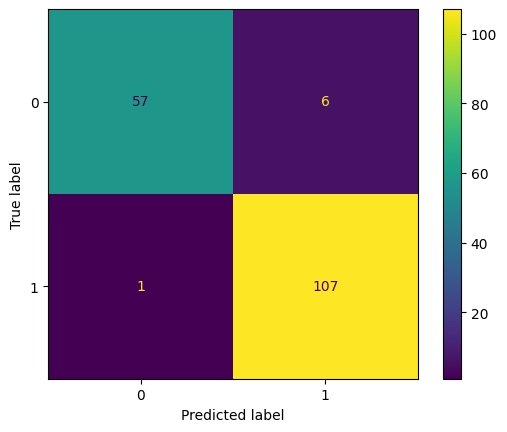

In [130]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_neigh), display_labels=clf.classes_).plot()
classification_report(y_test,y_predict_neigh)

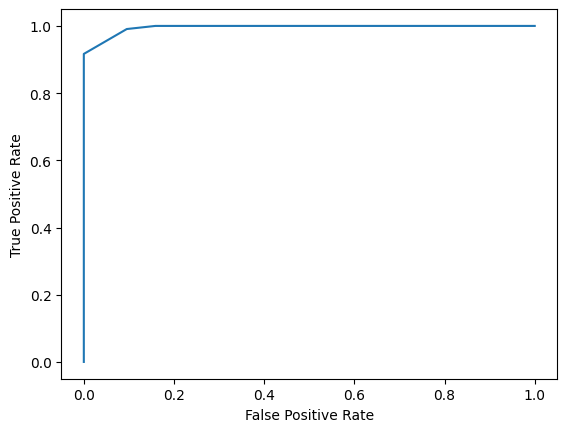

In [136]:
y_scores_neigh = neigh.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_neigh, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [131]:
neigh2 = KNeighborsClassifier(n_neighbors=3, metric = "manhattan")
neigh2.fit(X_train, y_train)
y_predict_neigh2 = neigh2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'              precision    recall  f1-score   support\n\n           0       0.93      0.90      0.92        63\n           1       0.95      0.96      0.95       108\n\n    accuracy                           0.94       171\n   macro avg       0.94      0.93      0.94       171\nweighted avg       0.94      0.94      0.94       171\n'

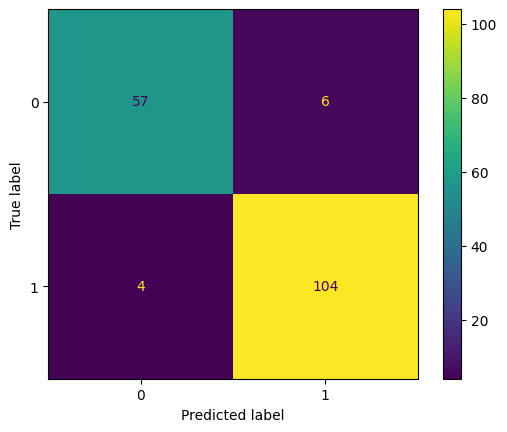

In [132]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_neigh2), display_labels=clf.classes_).plot()
classification_report(y_test,y_predict_neigh2)

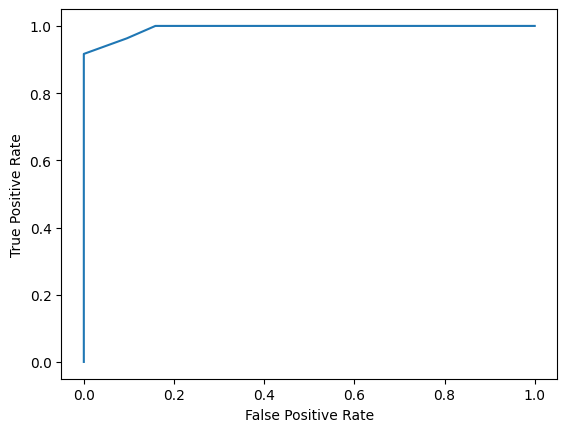

In [137]:
y_scores_neigh2 = neigh2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_neigh2, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()